<img src="https://bit.ly/2VnXWr2" width="100" align="left">

# Project | ML: Job offers' Fraud-Detection with NLP

## Introduction

In order to experience how to work in a ML project as a group, and to learn more on NLP we have been working on this dataset from Kaggle, [[Real or Fake] Fake Job Posting Prediction](https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction), that holds around 18K job descriptions out of which about 900 are fake. The data consists of both textual information and meta-information about the jobs. 

### Objectives

 We mainly wanted to create a **classification model using text data features and meta-features to predict which job descriptions are fraudulent**. As well as, finding out if there are **key traits/features** (words, entities, phrases) of job descriptions which are **intrinsically fraudulent**.

### Imports

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Visualization for text
from PIL import Image
from os import path
import os
import random
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import spacy
import string
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm
from collections import Counter

# Machine Learning packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Ignore noise warning
import warnings
warnings.filterwarnings('ignore')

# Work with pickles
import pickle

# Fix imbalance
from imblearn.under_sampling import InstanceHardnessThreshold

# Model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

Using TensorFlow backend.


## 1. Exploratory Data Analysis

### Context

As said above, we've worked on a dataset of job descriptions and their meta information in which a small proportion of these descriptions were fake or scam, which can be identified by the column "fraudulent".

**Columns**:
* `job_id` Unique Job ID
* `title` The title of the job ad entry.
* `location` Geographical location of the job ad.
* `department` Corporate department (e.g. sales).f
* `salary_range` Indicative salary range (e.g. $50,000-$60,000)
* `company_profile` A brief company description.
* `description` The details description of the job ad.
* `requirements` Enlisted requirements for the job opening.
* `benefits` Enlisted offered benefits by the employer.
* `telecommuting` True for telecommuting positions.
* `has_company_logo` True if company logo is present.
* `has_questions` True if screening questions are present.
* `employment_type` Full-type, Part-time, Contract, etc.
* `required_experience` Executive, Entry level, Intern, etc.
* `required_education` Doctorate, Master’s Degree, Bachelor, etc.
* `industry Automotive` IT, Health care, Real estate, etc.
* `function Consulting` Engineering, Research, Sales etc.
* `fraudulent` **target** Classification attribute

### Global EDA

#### Read dataset and check head

In [2]:
data = pd.read_csv("data/fake_job_postings.csv")
data.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

#### Check shape

In [3]:
data.shape

(17880, 18)

#### Check dtypes and columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

#### Check nulls

In [5]:
data.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

#### Check duplicates

In [6]:
data.duplicated().sum()

0

#### Check uniques

In [7]:
data.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

#### Target variable distribution

In [8]:
data.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

### Numerical columns

In [9]:
data.describe()

job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

At first we only got 5 numerical columns being one of them an index ("job_id").

#### See some descriptive statistics of numerical variables

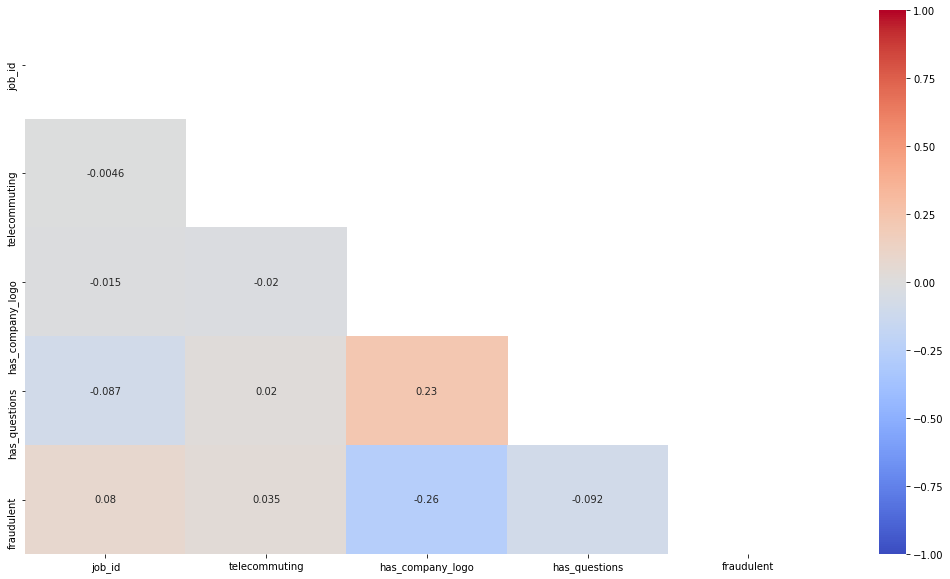

In [10]:
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(), mask=mask, cmap='coolwarm', annot=True, vmin=-1, vmax=1) 
sns.set_context("talk")
plt.show()

#### Comments

With the raw data we can only find a single correlationship with the target "fraudulent" that is somewhat significative:
*  It seems it is slightly more common for fraudulent job offers to not contain the company logo, though the relationship is of `-0.26`.

### Categorical variables

#### Visualization

In [11]:
data_1 = data.copy()

We will use countplots to visualize most common words in categorical columns, which are not whole sentences/paragraphs, from fraudulent offers against real ones.

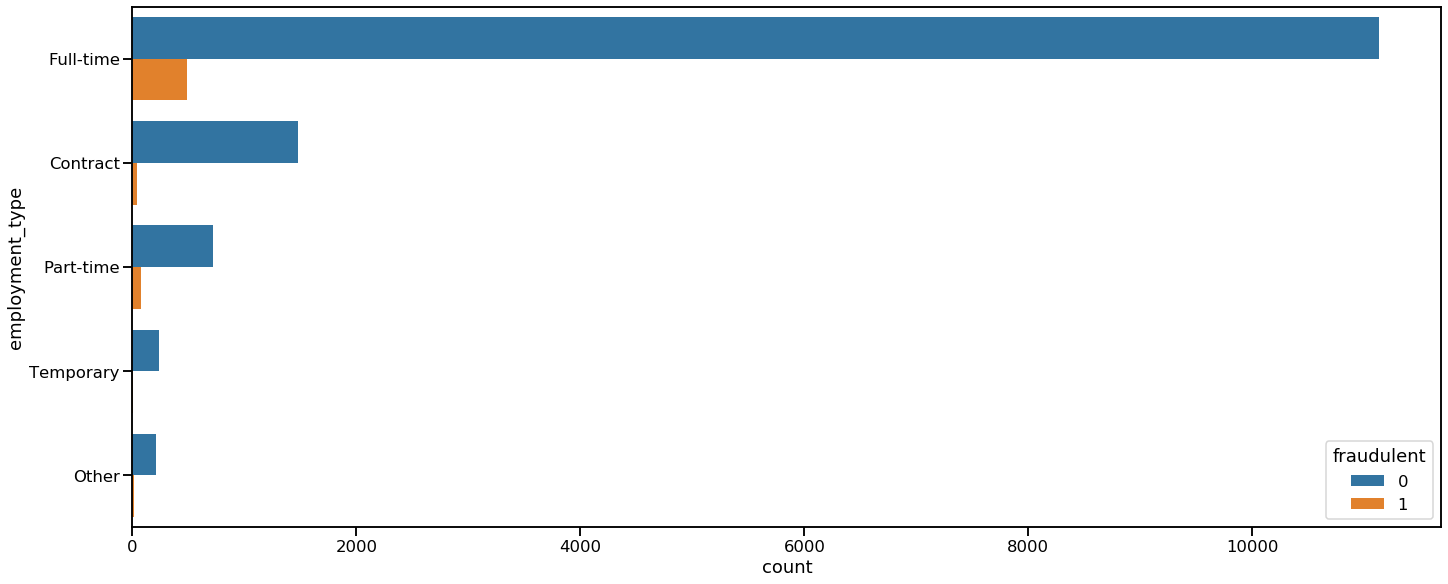

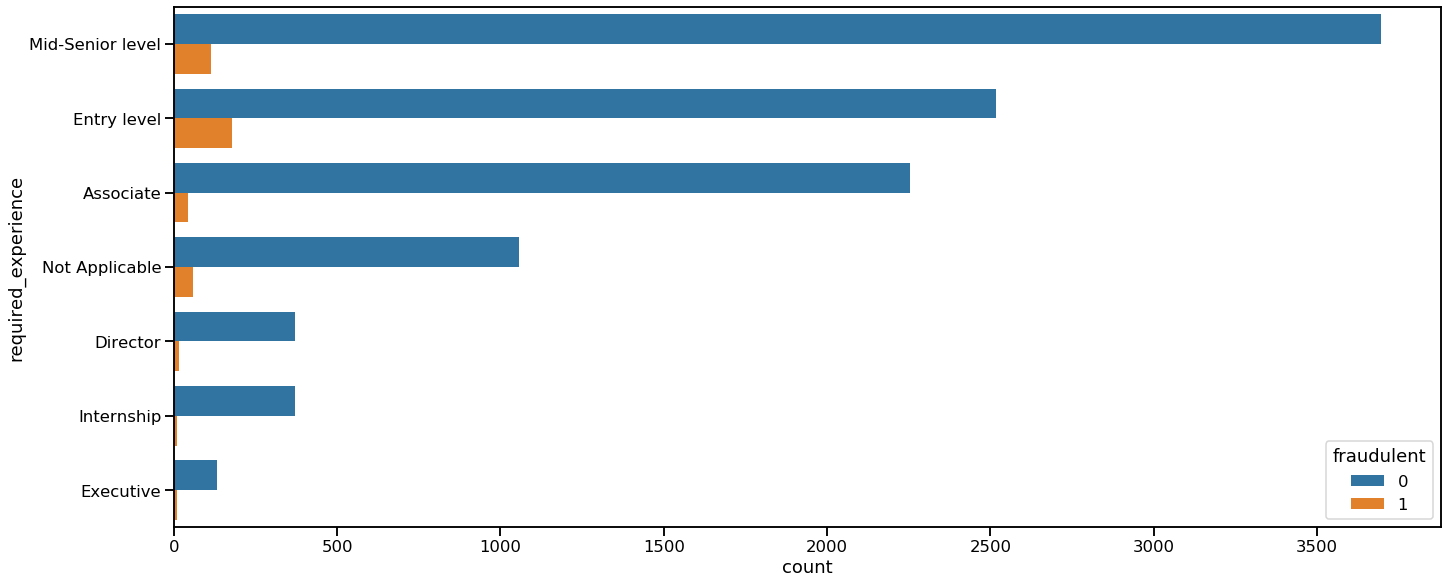

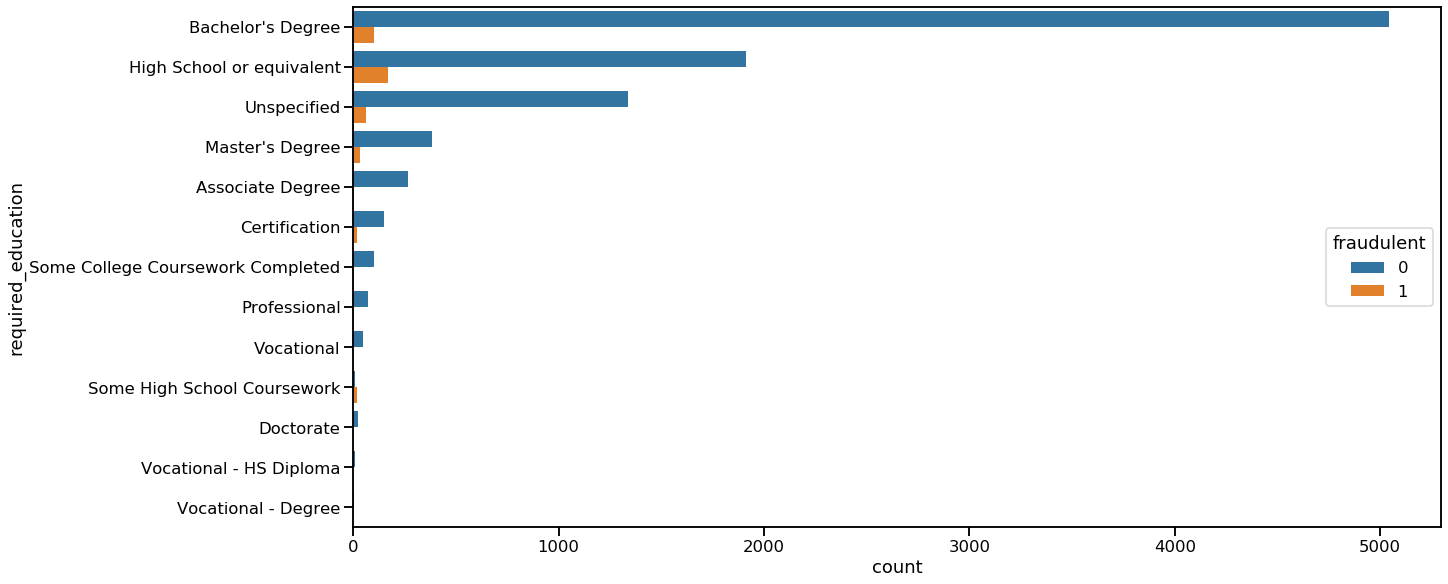

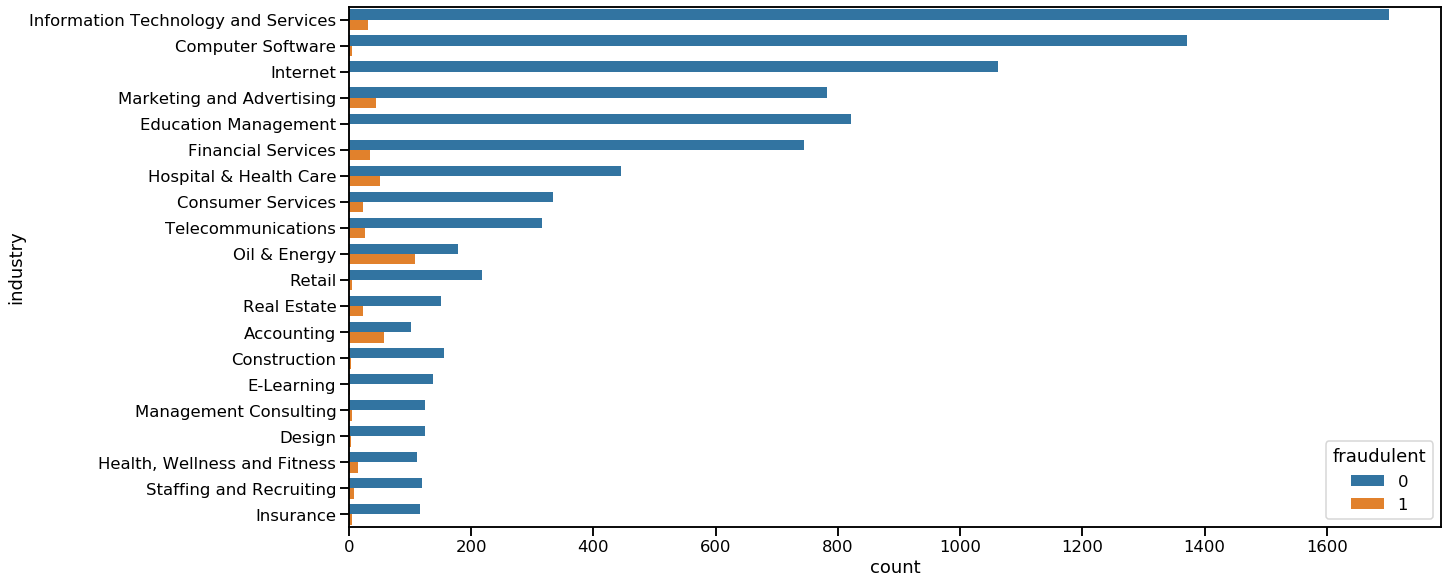

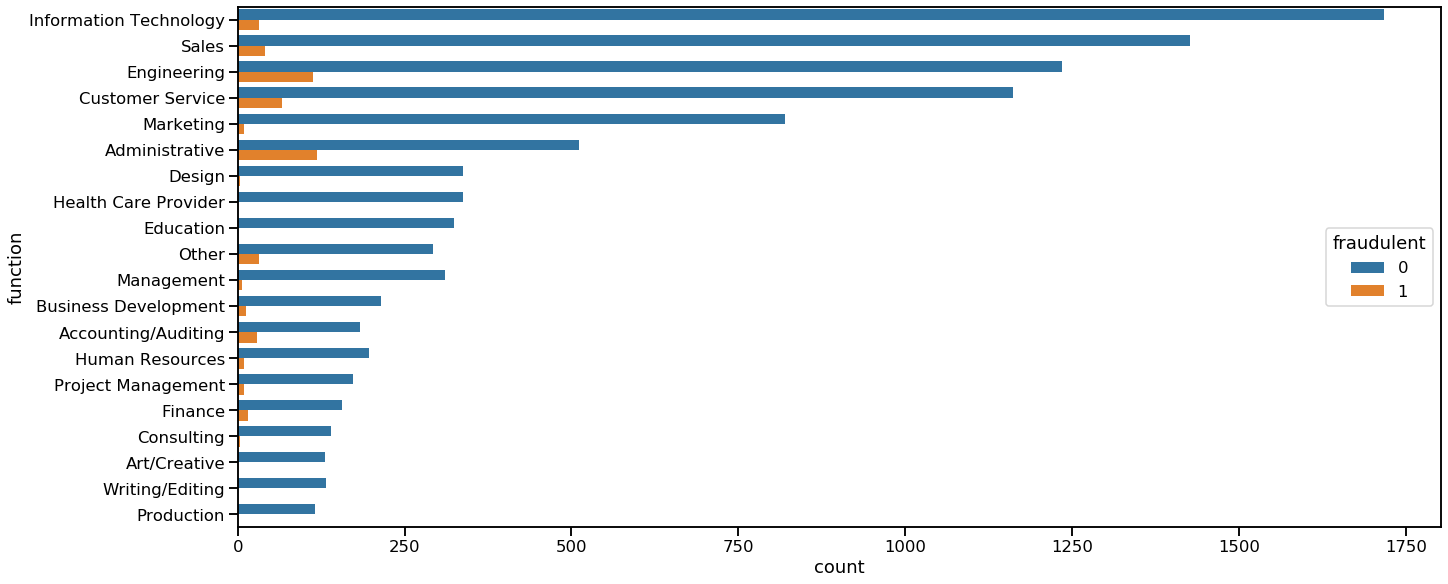

In [12]:
fig, ax = plt.subplots(figsize=(20,8),constrained_layout=True)
ax = sns.countplot(hue="fraudulent",y="employment_type",data=data_1,
                   order=data_1.employment_type.value_counts().iloc[:20].index)

fig, ax = plt.subplots(figsize=(20,8),constrained_layout=True)
ax = sns.countplot(hue="fraudulent",y="required_experience",data=data_1,
                   order=data_1.required_experience.value_counts().iloc[:20].index)
              
fig, ax = plt.subplots(figsize=(20,8),constrained_layout=True)              
ax = sns.countplot(hue="fraudulent",y="required_education",data=data_1,
                   order=data_1.required_education.value_counts().iloc[:20].index)
              
fig, ax = plt.subplots(figsize=(20,8),constrained_layout=True)              
ax = sns.countplot(hue="fraudulent",y="industry",data=data_1,
                   order=data_1.industry.value_counts().iloc[:20].index)

fig, ax = plt.subplots(figsize=(20,8),constrained_layout=True)              
ax = sns.countplot(hue="fraudulent",y="function",data=data_1,
                   order=data_1.function.value_counts().iloc[:20].index)

sns.set_context("talk")
plt.show()

We will use wordclouds to visualize most common words in categorical columns which are whole sentences/paragraphs from fraudulent offers.

In [15]:
data_1 = data_1.loc[data_1["fraudulent"]==1]

In [16]:
for value in data_1[["title","department","company_profile","description","requirements","benefits"]]:
    data_1[value]= data_1[value].astype(str, errors="ignore")

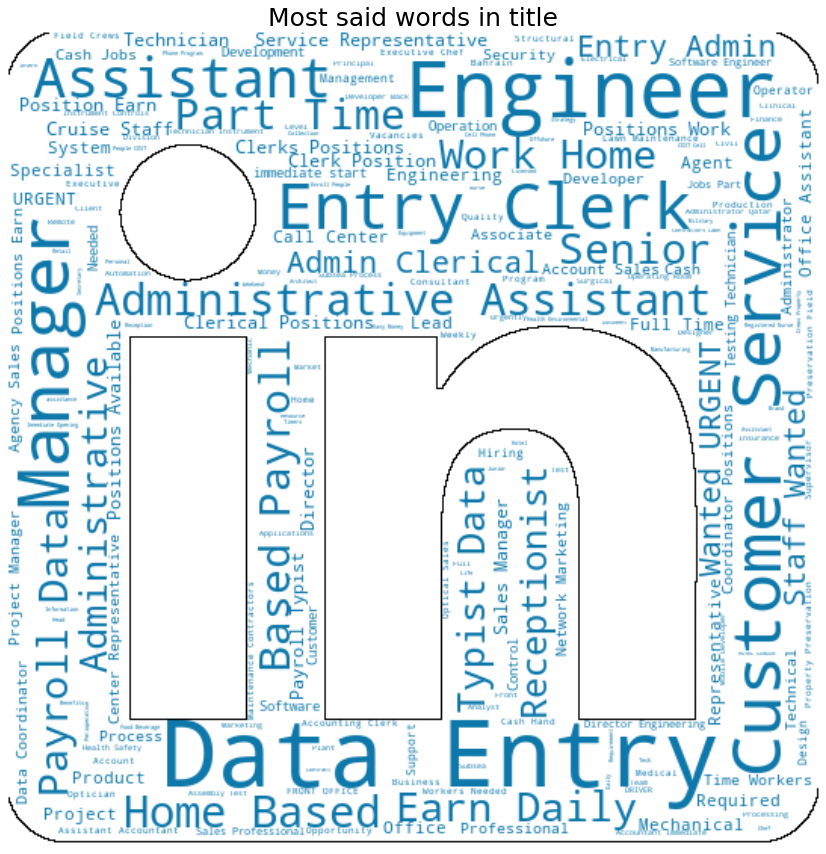

In [25]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(14, 120, 170)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["title"])

mask = np.array(Image.open(path.join(d, "images/LI-In-Bug.png")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/linkedin_logo.png"))

plt.figure(figsize=(15,15))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis('off')

plt.grid(True)
plt.title("Most said words in title", fontsize=25)
sns.set_context("talk")
plt.show()

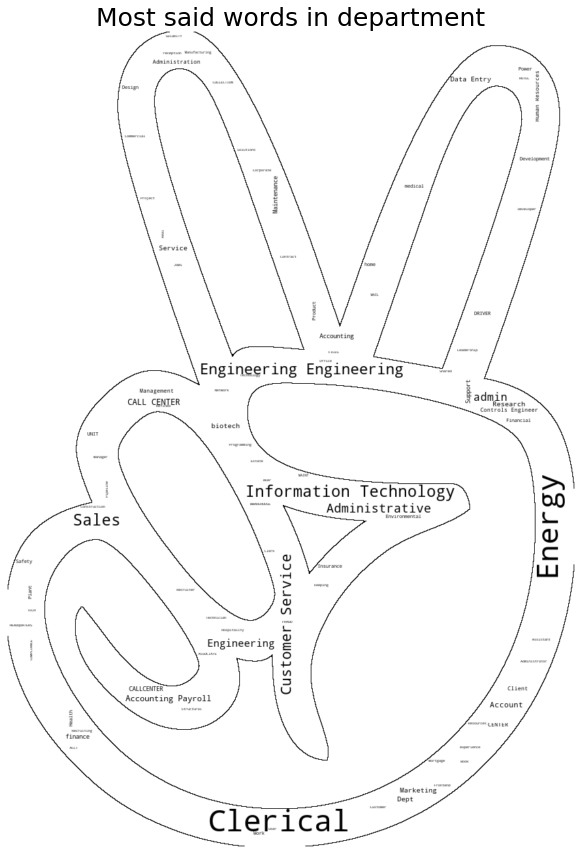

In [26]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(1, 1, 1)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["department"])

mask = np.array(Image.open(path.join(d, "images/AngelList_Black_Victory_Hand.png")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/angellist_logo.png"))

plt.figure(figsize=(15,15))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis('off')
plt.grid(True)
plt.title("Most said words in department", fontsize=25)
sns.set_context("talk")
plt.show()

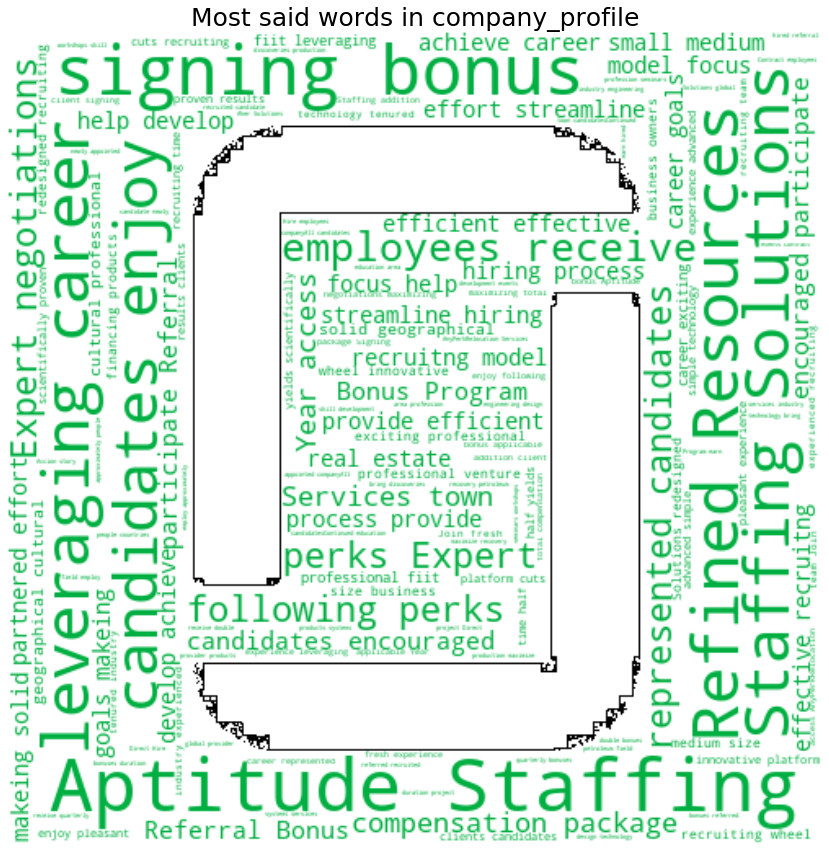

In [27]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(0, 175, 65)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["company_profile"])

mask = np.array(Image.open(path.join(d, "images/glassdoor-socialicon-rgb.jpg")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/glassdoor_logo.png"))

plt.figure(figsize=(15,15))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1), interpolation='bilinear')
plt.axis('off')

plt.grid(True)
plt.title("Most said words in company_profile", fontsize=25)
sns.set_context("talk")
plt.show()

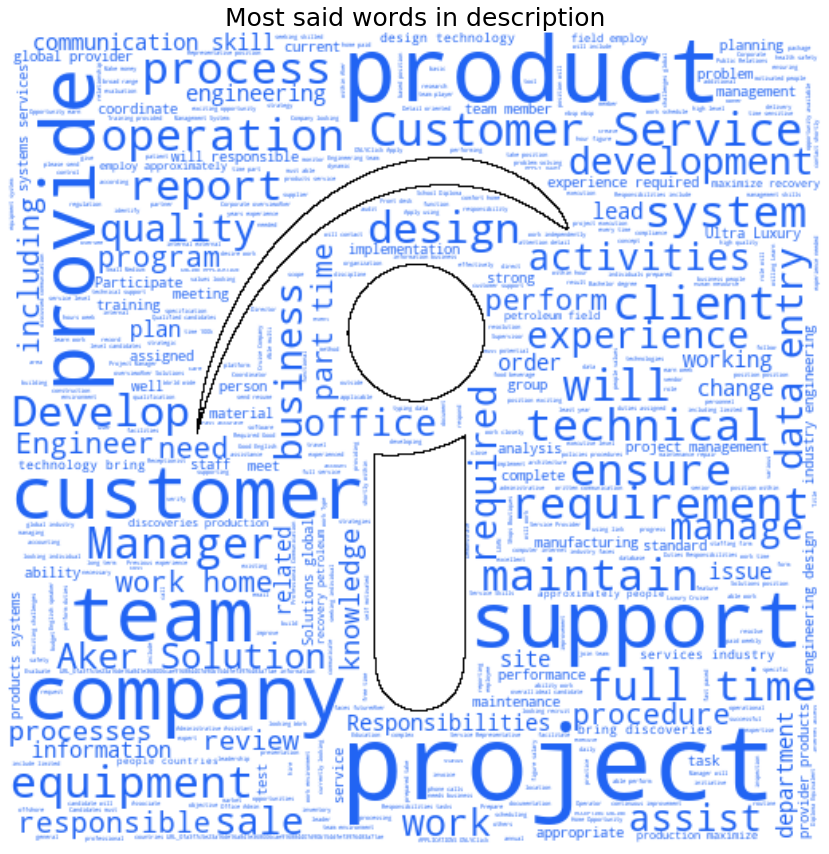

In [28]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(33, 100, 243)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["description"])

mask = np.array(Image.open(path.join(d, "images/Indeed_logo.png")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/indeed_logo.png"))

plt.figure(figsize=(15,15))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1), interpolation='bilinear')
plt.axis('off')

plt.grid(True)
plt.title("Most said words in description", fontsize=25)
sns.set_context("talk")
plt.show()

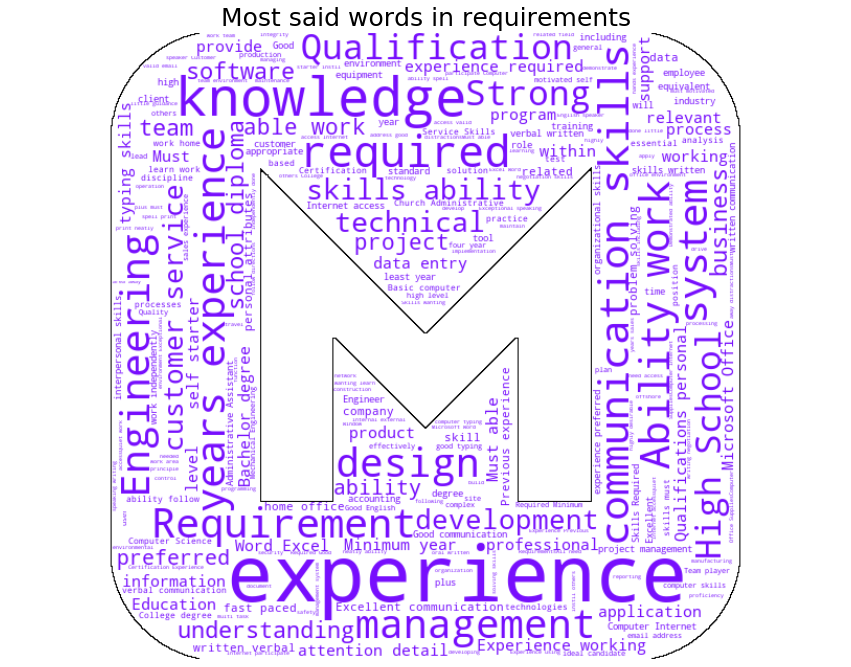

In [29]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(119, 14, 253)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["requirements"])

mask = np.array(Image.open(path.join(d, "images/moster_logo.png")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/monster_logo.png"))

plt.figure(figsize=(15,15))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1), interpolation='bilinear')
plt.axis('off')

plt.grid(True)
plt.title("Most said words in requirements", fontsize=25)
sns.set_context("talk")
plt.show()

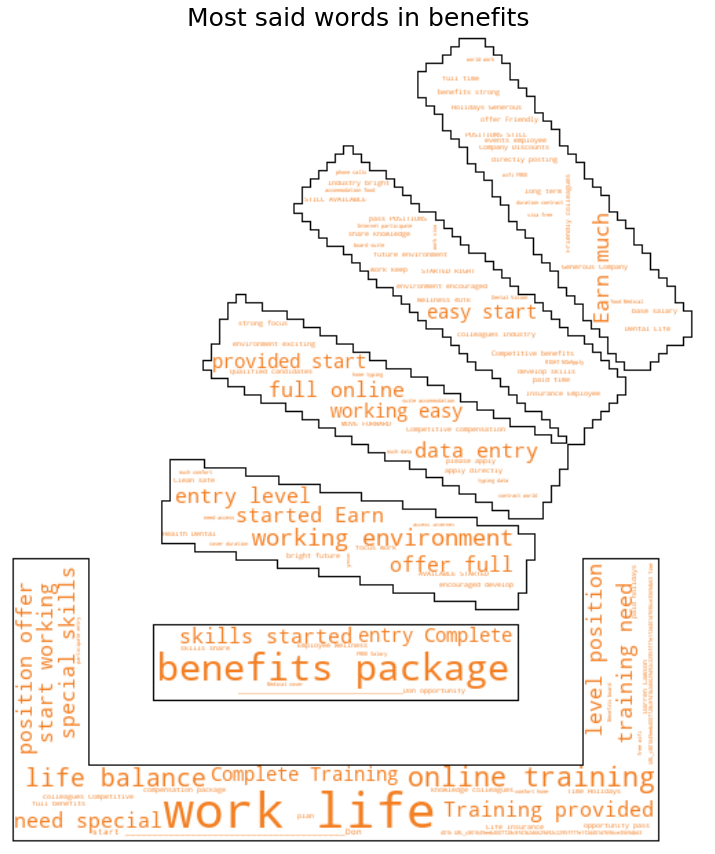

In [31]:
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "rgb(244, 128, 36)"

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = " ".join(data_1["benefits"])

mask = np.array(Image.open(path.join(d, "images/stackoverflow_logo.PNG")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/stackoverflow_logo.png"))

plt.figure(figsize=(15,15))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1), interpolation='bilinear')
plt.axis('off')

plt.grid(True)
plt.title("Most said words in benefits", fontsize=25)
sns.set_context("talk")
plt.show()

#### Comments

It seems there is terms that are more frequent than others but we still can't establish any sort of relationship between those terms' frequencies and our target variable, or at least, we can't with those categorical variables where there are far too many unique values.

### Categorical columns: Text and lots of uniques 

In order to better appreciate if it may be a relationship between variables of pure text where there is plenty of different unique values, we will tokenize text columns' content to form a Bag of Words.

#### BoW

In [32]:
data_text = data[['job_id', 'title','department', 'company_profile', 'description', 'requirements', 'benefits']].copy()

In [33]:
data_text = data_text.fillna('')
text_columns = data_text[['job_id']]
text_columns['text'] = data_text.iloc[:,1:].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [34]:
def clean_urls(column):
    '''
    This function takes a string and returns a string 
    with its urls removed and all the words in lowercase.
    '''
    return column.apply(lambda x: x.lower()).apply(lambda x: re.sub('http[s]?://\S+', '', x))

text_columns['text'] = clean_urls(text_columns['text'])

<img src="images/danger-explosives-sign.jpg" width="200"> 

In [35]:
raise SystemExit("Stop right there! Run cells one by one till the next heading.")

SystemExit: Stop right there! Run cells one by one till the next heading.

In [36]:
nlp = spacy.load('en_core_web_sm', disable = ['ner', 'parser']) 
nlp.max_length = 33000000

In [37]:
def tokenize(string):
    '''
    This function takes a sentence and returns the list of all lemma
    '''
    doc = nlp(string)
    l_token = [token.text for token in doc if not token.is_punct 
               | token.is_space | token.is_stop | token.is_digit & token.is_oov]
    return ' '.join(l_token)


text_columns['text'] = text_columns['text'].apply(lambda row: tokenize(row))

In [38]:
pd_token = pd.DataFrame(text_columns, columns=['job_id', 'text'])
pd_token.head()

job_id                                               text
0       1  marketing intern marketing food52 created grou...
1       2  customer service cloud video production succes...
2       3  commissioning machinery assistant cma valor se...
3       4  account executive washington dc sales passion ...
4       5  bill review manager spotsource solutions llc g...

In [44]:
pd_token.to_pickle("data/output_pickles/token.pkl")

#### Visualization

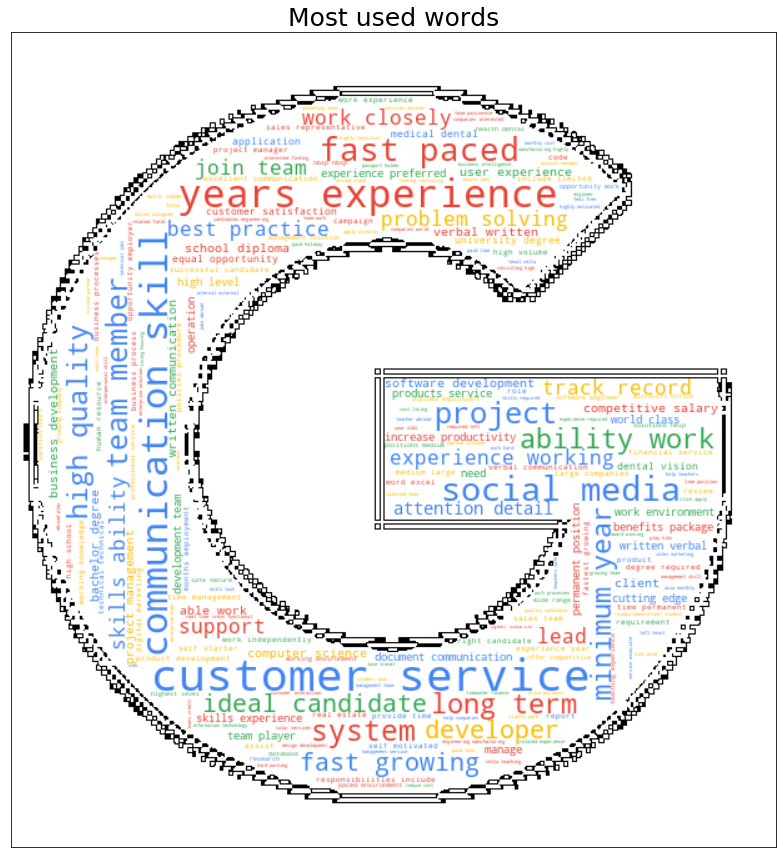

In [45]:
colors = ["rgb(52, 168, 83)", "rgb(251, 188, 5)", "rgb(66, 133, 244)", "rgb(234, 67, 53)"]
def grey_color_func(word, font_size, position, orientation, random_state=1,**kwargs):
    return random.choice(colors)

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = "".join(pd_token["text"])

mask = np.array(Image.open(path.join(d, "images/logo_google.png")))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords, max_words=1000,
               repeat=False, min_word_length=4, mask=mask, contour_width=1)

wc.generate(text)

wc.to_file(path.join(d, "images/output_images/google_logo.png"))

plt.figure(figsize=(15,15))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1), interpolation='bilinear')

plt.axis('off')

plt.grid(True)

plt.title("Most used words", fontsize=25)
sns.set_context("talk")
plt.show()

#### Comments

After tokenizing we can se that there's words or short expressions which are more common than others in "text" columns but there's still too much information and it is too raw as to get interesting insights from it.

## 2. Data preprocessing

### Categorical

Categorical refers to columns of categorical variables which are not whole sentences/paragraphs.

In [30]:
categorical_columns = data[["job_id","employment_type", "required_experience", 
                            "required_education", "industry", "function"]].copy()

In [31]:
categorical_columns = categorical_columns.fillna("other")


In [32]:
for column in categorical_columns.columns[1:]:
    categorical_columns[column] = categorical_columns[column].str.lower()

In [33]:
unique_industries_percentage = categorical_columns['industry'].value_counts()/categorical_columns.shape[0]*100

unique_industries_indexes = list(unique_industries_percentage[unique_industries_percentage >= 1].index)

other_industry = categorical_columns["industry"][~categorical_columns["industry"].isin(unique_industries_indexes)].unique()

categorical_columns["industry"].replace(other_industry,"other", inplace=True)

In [34]:
vals_to_replace = {"not applicable":"other", "mid-senior level":"associate", "director":"executive"}
categorical_columns["required_experience"] = categorical_columns["required_experience"].replace(vals_to_replace)


vals_to_replace = {"information technology and services":"information technologies","internet":"information technologies",
                   "computer software":"information technologies", "telecommunications":"information technologies"}

categorical_columns["industry"] = categorical_columns["industry"].replace(vals_to_replace)


vals_to_replace = {"unspecified":"other","some high school coursework":"high school or equivalent",
                   "vocational - hs diploma":"high school or equivalent", "mid-senior level":"associate",
                   "some college coursework completed":"associate degree", "professional":"vocational",
                   "vocational - degree":"vocational","certification":"vocational"}

categorical_columns["required_education"] = categorical_columns["required_education"].replace(vals_to_replace)


vals_to_replace = {"design":"marketing", "public relations":"marketing", "advertising":"marketing", "art/creative":"marketing", 
                   "financial analyst":"finance", "accounting/auditing":"finance","financial analyst":"finance",
                   "training":"human resources","data analyst":"information technology","supply chain":"production",
                   "manufacturing":"production", "quality assurance":"production","project management":"management",
                   "product management":"management", "strategy/planning": "management","sales":"business development",
                   "general business":"business development", "business analyst":"business development",
                   "purchasing":"business development","research":"research and development",
                   "science":"research and development"}

categorical_columns["function"] = categorical_columns["function"].replace(vals_to_replace)


In [35]:
# Split of localitation column

# new data frame with split value columns 
new = data["location"].str.split(",", n = 2, expand = True) 
  
# making separate columns from new data frame 
data["Country"]= new[0] 
data["Region"]= new[1]
data["City"] = new[2]


data['Country'].value_counts() # La distribución del 3r contry es menor a mil, y luego baja en picado.
top_countries = data['Country'].value_counts().head(4).index
other_countries = data['Country'][~data['Country'].isin(top_countries)].unique()

data['Country'].replace(other_countries, 'OTHER', inplace=True)

categorical_columns.loc[:,'Country'] = data.loc[:,'Country']

In [36]:
categorical_columns_dummies = pd.get_dummies(categorical_columns, columns = categorical_columns.columns[1:])

In [37]:
categorical_columns_dummies.head()

job_id  employment_type_contract  employment_type_full-time  \
0       1                         0                          0   
1       2                         0                          1   
2       3                         0                          0   
3       4                         0                          1   
4       5                         0                          1   

   employment_type_other  employment_type_part-time  \
0                      1                          0   
1                      0                          0   
2                      1                          0   
3                      0                          0   
4                      0                          0   

   employment_type_temporary  required_experience_associate  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              1   
4                          0                              1   

   required_experience_entry level  required_experience_executive  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   required_experience_internship  ...  function_marketing  function_other  \
0                               1  ...                   1               0   
1                               0  ...                   0               0   
2                               0  ...                   0               1   
3                               0  ...                   0               0   
4                               0  ...                   0               0   

   function_production  function_research and development  \
0                    0                                  0   
1                    0                                  0   
2                    0                                  0   
3                    0                                  0   
4                    0                                  0   

   function_writing/editing  Country_CA  Country_GB  Country_GR  \
0                         0           0           0           0   
1                         0           0           0           0   
2                         0           0           0           0   
3                         0           0           0           0   
4                         0           0           0           0   

   Country_OTHER  Country_US  
0              0           1  
1              1           0  
2              0           1  
3              0           1  
4              0           1  

[5 rows x 50 columns]

### Numerical

In [38]:
numerical_columns = data[['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']].copy()

In [39]:
salary_rows_in_benefits = data['benefits'].str.extractall(r'(\$\d+\,?\d+)').reset_index()['level_0'].unique()
salary_rows_in_description = data['description'].str.extractall(r'(\$\d+\,?\d+)').reset_index()['level_0'].unique()

data.loc[salary_rows_in_benefits, 'salary_range'] = 1
data.loc[salary_rows_in_description, 'salary_range'] = 1

nan_salaries = data['salary_range'].isnull()
with_salaries = list(data['salary_range'][~data['salary_range'].isnull()].unique())

data['salary_range'] = data['salary_range'].replace(with_salaries, 1)
data['salary_range'] = data['salary_range'].fillna(0)

numerical_columns['salary_range'] = data['salary_range']

In [40]:
numerical_columns.head()

job_id  telecommuting  has_company_logo  has_questions  fraudulent  \
0       1              0                 1              0           0   
1       2              0                 1              0           0   
2       3              0                 1              0           0   
3       4              0                 1              0           0   
4       5              0                 1              1           0   

   salary_range  
0           0.0  
1           1.0  
2           0.0  
3           0.0  
4           0.0

### Text

Text refers to columns of categorical variables which are whole sentences/paragraphs.

In [41]:
## Columns with text ##

company = ['company_profile', 'description']
offer = ['title', 'requirements', 'benefits']
columns = [*company, *offer] 

In [42]:
df_data_raw = data
df_data_raw[company] = data[company].fillna('')
df_data_raw[offer] = data[offer].fillna('')
df_data_raw.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department  salary_range                                    company_profile  \
0  Marketing           0.0  We're Food52, and we've created a groundbreaki...   
1    Success           1.0  90 Seconds, the worlds Cloud Video Production ...   
2        NaN           0.0  Valor Services provides Workforce Solutions th...   
3      Sales           0.0  Our passion for improving quality of life thro...   
4        NaN           0.0  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  ...  \
0                                                                 0  ...   
1  What you will get from usThrough being part of...              0  ...   
2                                                                 0  ...   
3  Our culture is anything but corporate—we have ...              0  ...   
4                              Full Benefits Offered              0  ...   

   has_questions  employment_type required_experience required_education  \
0              0            Other          Internship                NaN   
1              0        Full-time      Not Applicable                NaN   
2              0              NaN                 NaN                NaN   
3              0        Full-time    Mid-Senior level  Bachelor's Degree   
4              1        Full-time    Mid-Senior level  Bachelor's Degree   

                    industry              function fraudulent  Country Region  \
0                        NaN             Marketing          0       US     NY   
1  Marketing and Advertising      Customer Service          0    OTHER          
2                        NaN                   NaN          0       US     IA   
3          Computer Software                 Sales          0       US     DC   
4     Hospital & Health Care  Health Care Provider          0       US     FL   

          City  
0     New York  
1     Auckland  
2        Wever  
3   Washington  
4   Fort Worth  

[5 rows x 21 columns]

#### Declare functions

##### Data pre-cleaning 

In [43]:
def clean_url(str_text_raw):
    '''This function eliminate a string URL in a given text'''
    str_text = re.sub('url_\S+', '', str_text_raw)
    str_text = re.sub('email_\S+', '', str_text)
    str_text = re.sub('phone_\S+', '', str_text)
    return(re.sub('http[s]?://\S+', '', str_text))
    
def clean_punctuation(str_text_raw):
    '''This function replace some of the troublemaker puntuation elements in a given text'''
    return(re.sub('[$\(\)/|{|\}#~\[\]^#;:!?¿]', ' ', str_text_raw))

def clean_unicode(str_text_raw):
    '''This function eliminate non-unicode text'''
    str_text = re.sub('&amp;', '', str_text_raw)
    return(re.sub(r'[^\x00-\x7F]+',' ', str_text))
                      
def clean_dot_words(str_text_raw):
    '''This function replace the dots between words'''
    return(re.sub(r'(\w+)\.+(\w+)', r'\1 \2',str_text_raw))

def clean_text(str_text_raw):
    '''This function clean a given '''
    str_text = str_text_raw.lower()
    str_text = clean_dot_words(clean_punctuation(clean_unicode(clean_url(str_text))))
    return(str_text)

##### Tokenization and lemmatization

In [44]:
tokens_to_drop=['+']

def string_to_token(string, str_pickle = None):
    '''
    This function takes a sentence and returns the list of tokens and all their information
    * Text: The original text of the lemma.
    * Lemma: Lemma.
    * Orth: The hash value of the lemma.
    * is alpha: Does the lemma consist of alphabetic characters?
    * is digit: Does the lemma consist of digits?
    * is_title: Is the token in titlecase? 
    * is_punct: Is the token punctuation?
    * is_space: Does the token consist of whitespace characters?
    * is_stop: Is the token part of a “stop list”?
    * is_digit: Does the token consist of digits?
    * lang: Language of the token
    * tag: Fine-grained part-of-speech. The complete list is in: 
    https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html, also using: spacy.explain("RB")
    * pos: Coarse-grained part-of-speech.
    * has_vector: A boolean value indicating whether a word vector is associated with the token.
    * vector_norm: The L2 norm of the token’s vector representation.
    * is_ovv: '''
    doc = nlp(string)
    l_token = [[token.text, token.lemma_, token.orth, token.is_alpha, token.is_digit, token.is_title, token.lang_, 
        token.tag_, token.pos_, token.has_vector, token.vector_norm, token.is_oov]
        for token in doc if not token.is_punct | token.is_space | token.is_stop | token.is_digit | token.like_url 
               | token.like_num | token.like_email & token.is_oov]
    pd_token = pd.DataFrame(l_token, columns=['text', 'lemma', 'orth', 'is_alpha', 'is_digit', 'is_title', 'language',
                                          'tag', 'part_of_speech', 'has_vector', 'vector_norm', 'is_oov'])
    #drop problematic tokens
    pd_token = pd_token[~pd_token['text'].isin(tokens_to_drop)]
    #Convert plural text to singular
    pd_token['text_to_singular'] = np.where(pd_token['tag'].isin(['NNPS', 'NNS']), pd_token['lemma'], pd_token['text'])
    if(str_pickle!=None):
        pd_token.to_pickle(f'data/output_pickles/{str_pickle}.pkl') #Modified
    del l_token
    return(pd_token)

def apply_cleaning(string):
    '''
    This function takes a sentence and returns a clean text
    '''
    doc = nlp(clean_text(string))
    l_token = [token.text for token in doc if not token.is_punct | token.is_space | token.is_stop | 
               token.is_digit | token.like_url | token.like_num | token.like_email & token.is_oov]
    return ' '.join(l_token)

def apply_lemma(string):
    '''
    This function takes a sentence and returns a clean text
    '''
    doc = nlp(clean_text(string))
    l_token = [token.lemma_ for token in doc if not token.is_punct | token.is_space | token.is_stop | 
               token.is_digit | token.like_url | token.like_num | token.like_email & token.is_oov]
    return ' '.join(l_token)

def list_to_bow(l_words):
    '''
    This function takes a list of words and create the bag of words ordered by desc order
    '''
    cv = CountVectorizer(l_words)
    # show resulting vocabulary; the numbers are not counts, they are the position in the sparse vector.
    count_vector=cv.fit_transform(l_words)
    word_freq = Counter(l_words)
    print(f'Bag of words size: {count_vector.shape}\nUnique words size: {len(word_freq)}')
    dict_word_freq = dict(word_freq.most_common())
    return(dict_word_freq)

#### Group text info and clean data

In [45]:
df_data = pd.DataFrame(df_data_raw[['job_id', 'fraudulent']])
for c in columns:
    df_data[c] = df_data_raw[c].apply(lambda row: clean_text(row))
df_data['company'] = df_data_raw[company].apply(lambda x: ' '.join(x), axis=1)
df_data['offer'] = df_data_raw[offer].apply(lambda x: ' '.join(x), axis=1)
df_data.head()

job_id  fraudulent                                    company_profile  \
0       1           0  we're food52, and we've created a groundbreaki...   
1       2           0  90 seconds, the worlds cloud video production ...   
2       3           0  valor services provides workforce solutions th...   
3       4           0  our passion for improving quality of life thro...   
4       5           0  spotsource solutions llc is a global human cap...   

                                         description  \
0  food52, a fast-growing, james beard award-winn...   
1  organised - focused - vibrant - awesome do you...   
2  our client, located in houston, is actively se...   
3  the company  esri   environmental systems rese...   
4  job title  itemization review managerlocation ...   

                                       title  \
0                           marketing intern   
1  customer service - cloud video production   
2    commissioning machinery assistant  cma    
3          account executive - washington dc   
4                        bill review manager   

                                        requirements  \
0  experience with content management systems a m...   
1  what we expect from you your key responsibilit...   
2  implement pre-commissioning and commissioning ...   
3  education  bachelor s or master s in gis, busi...   
4  qualifications rn license in the state of texa...   

                                            benefits  \
0                                                      
1  what you will get from usthrough being part of...   
2                                                      
3  our culture is anything but corporate we have ...   
4                              full benefits offered   

                                             company  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                               offer  
0  Marketing Intern Experience with content manag...  
1  Customer Service - Cloud Video Production What...  
2  Commissioning Machinery Assistant (CMA) Implem...  
3  Account Executive - Washington DC EDUCATION: B...  
4  Bill Review Manager QUALIFICATIONS:RN license ...

#### Load the unified text in the spacy nlp, tokenize rows and stores it in pickles .

<img src="images/danger-explosives-sign.jpg" width="200"> 

In [46]:
raise SystemExit("his is a very consumming memory process, with average wall time: ~ 20 min. If you don't want to wait please go to the next step")

SystemExit: his is a very consumming memory process, with average wall time: ~ 20 min. If you don't want to wait please go to the next step

In [47]:
%%time
for column in columns:    
    str_bow_column = ' '.join(df_data[column])
    pd_token = string_to_token(str_bow_column, f'token_{column}')
    print(f'Length of {column} column: {len(str_bow_column)}')
    print(f'Number of tokens created: {pd_token.shape[0]}\n')

Length of company_profile column: 10803421
Number of tokens created: 951239

Length of description column: 21121576
Number of tokens created: 1879201

Length of title column: 528000
Number of tokens created: 61147

Length of requirements column: 10397543
Number of tokens created: 938765

Length of benefits column: 3634448
Number of tokens created: 326481

Wall time: 5min 50s


#### Load the pickles into Dataframe

In [48]:
%%time
pd_token = pd.DataFrame(columns=['column', 'text', 'lemma', 'orth', 'is_alpha', 'is_digit', 'is_title', 'language', 'tag', 
                                 'part_of_speech', 'has_vector', 'vector_norm', 'is_oov', 'text_to_singular'])
for column in columns:
    pd_temp = pd.read_pickle(f'data/output_pickles/token_{column}.pkl') #Modified
    pd_temp['column'] = column
    print(f'Loading {column} info with {pd_temp.shape[0]} rows')
    pd_token = pd.concat([pd_token, pd_temp])
print(f'Total rows loaded: {pd_token.shape[0]}')

Loading company_profile info with 951239 rows
Loading description info with 1879201 rows
Loading title info with 61147 rows
Loading requirements info with 938765 rows
Loading benefits info with 326481 rows
Total rows loaded: 4156833
Wall time: 13.9 s


#### Wordclouds

Bag of words size: (4156833, 91901)
Unique words size: 96965


<function matplotlib.pyplot.show(*args, **kw)>

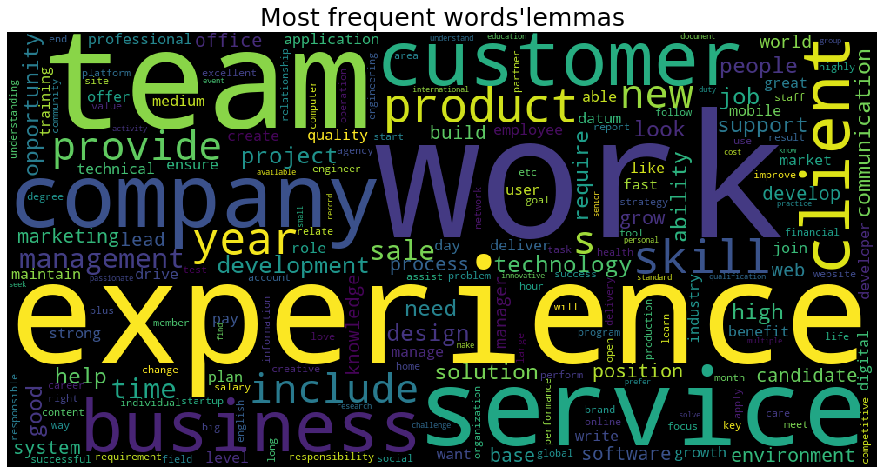

In [49]:
dict_word_freq_lemma = list_to_bow(list(pd_token['lemma']))
wordcloud = WordCloud(width = 1000, height = 500, normalize_plurals=True).generate_from_frequencies(dict_word_freq_lemma)
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most frequent words'lemmas", fontsize=25)
plt.savefig("images/output_images/lemmasWC.png")
plt.show

Bag of words size: (4156833, 94605)
Unique words size: 99888


<function matplotlib.pyplot.show(*args, **kw)>

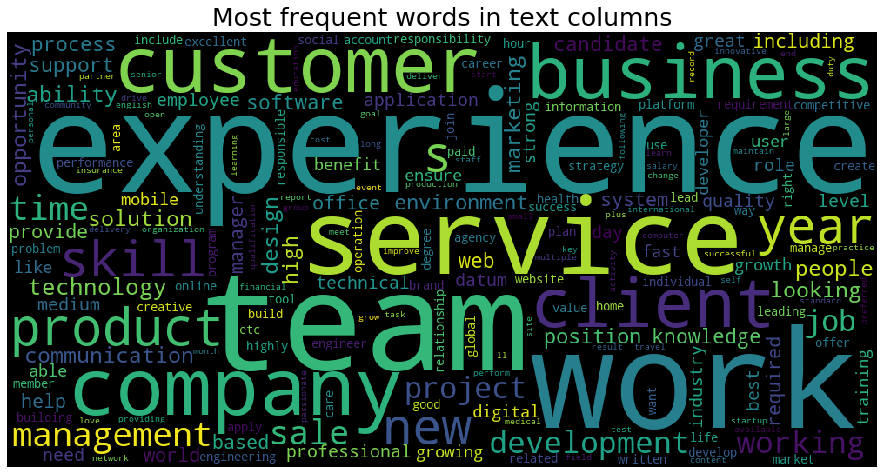

In [50]:
dict_word_freq_texts = list_to_bow(list(pd_token['text_to_singular']))
wordcloud = WordCloud(width = 1000, height = 500, normalize_plurals=True).generate_from_frequencies(dict_word_freq_texts)
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most frequent words in text columns", fontsize=25)
plt.savefig("images/output_images/text_columnsWC.png")
plt.show

Bag of words size: (2830440, 58783)
Unique words size: 61743


<function matplotlib.pyplot.show(*args, **kw)>

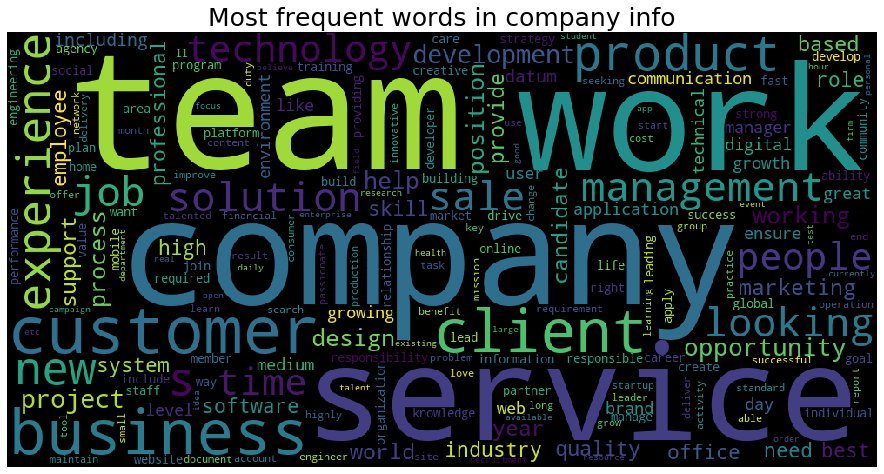

In [51]:
dict_word_freq_company = list_to_bow(list(pd_token[pd_token['column'].isin(company)]['text_to_singular']))
wordcloud = WordCloud(width = 1000, height = 500, normalize_plurals=True).generate_from_frequencies(dict_word_freq_company)
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most frequent words in company info", fontsize=25)
plt.savefig("images/output_images/company_infoWC.png")
plt.show

Bag of words size: (1326393, 55187)
Unique words size: 58135


<function matplotlib.pyplot.show(*args, **kw)>

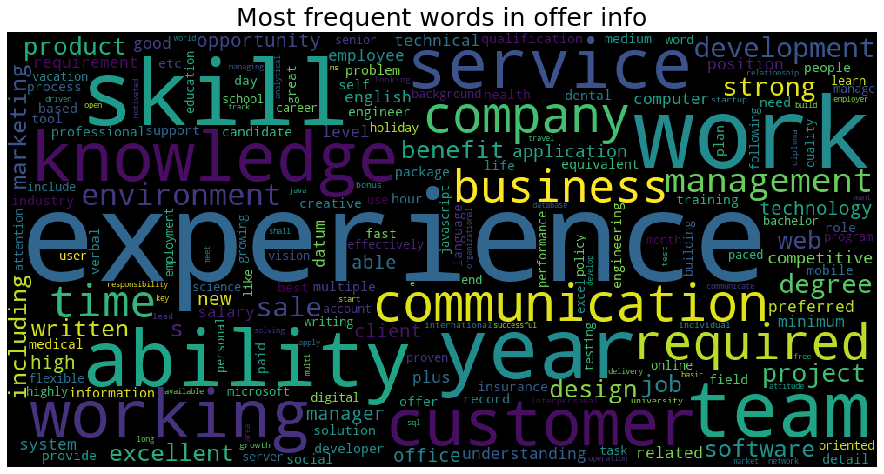

In [52]:
dict_word_freq_offer = list_to_bow(list(pd_token[pd_token['column'].isin(offer)]['text_to_singular']))
wordcloud = WordCloud(width = 1000, height = 500, normalize_plurals=True).generate_from_frequencies(dict_word_freq_offer)
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most frequent words in offer info", fontsize=25)
plt.savefig("images/output_images/offer_infoWC.png")
plt.show

#### Apply cleaned info to the dataset and store it into a pickle

In [53]:
df_data['company_clean'] = df_data['company'].apply(lambda x: apply_cleaning(x))
df_data['offer_clean']   = df_data['offer'].apply(lambda x: apply_cleaning(x))
df_data['company_lemma'] = df_data['company'].apply(lambda x: apply_lemma(x))
df_data['offer_lemma']   = df_data['offer'].apply(lambda x: apply_lemma(x))
df_data.head()

job_id  fraudulent                                    company_profile  \
0       1           0  we're food52, and we've created a groundbreaki...   
1       2           0  90 seconds, the worlds cloud video production ...   
2       3           0  valor services provides workforce solutions th...   
3       4           0  our passion for improving quality of life thro...   
4       5           0  spotsource solutions llc is a global human cap...   

                                         description  \
0  food52, a fast-growing, james beard award-winn...   
1  organised - focused - vibrant - awesome do you...   
2  our client, located in houston, is actively se...   
3  the company  esri   environmental systems rese...   
4  job title  itemization review managerlocation ...   

                                       title  \
0                           marketing intern   
1  customer service - cloud video production   
2    commissioning machinery assistant  cma    
3          account executive - washington dc   
4                        bill review manager   

                                        requirements  \
0  experience with content management systems a m...   
1  what we expect from you your key responsibilit...   
2  implement pre-commissioning and commissioning ...   
3  education  bachelor s or master s in gis, busi...   
4  qualifications rn license in the state of texa...   

                                            benefits  \
0                                                      
1  what you will get from usthrough being part of...   
2                                                      
3  our culture is anything but corporate we have ...   
4                              full benefits offered   

                                             company  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                               offer  \
0  Marketing Intern Experience with content manag...   
1  Customer Service - Cloud Video Production What...   
2  Commissioning Machinery Assistant (CMA) Implem...   
3  Account Executive - Washington DC EDUCATION: B...   
4  Bill Review Manager QUALIFICATIONS:RN license ...   

                                       company_clean  \
0  food52 created groundbreaking award winning co...   
1  seconds worlds cloud video production service ...   
2  valor services provides workforce solutions me...   
3  passion improving quality life geography heart...   
4  spotsource solutions llc global human capital ...   

                                         offer_clean  \
0  marketing intern experience content management...   
1  customer service cloud video production expect...   
2  commissioning machinery assistant cma implemen...   
3  account executive washington dc education bach...   
4  bill review manager qualifications rn license ...   

                                       company_lemma  \
0  food52 create groundbreaking award win cooking...   
1  second world cloud video production service se...   
2  valor services provide workforce solution meet...   
3  passion improve quality life geography heart e...   
4  spotsource solutions llc global human capital ...   

                                         offer_lemma  
0  market intern experience content management sy...  
1  customer service cloud video production expect...  
2  commission machinery assistant cma implement p...  
3  account executive washington dc education bach...  
4  bill review manager qualification rn license s...

In [55]:
df_data.to_pickle('data/output_pickles/clean_text_columns.pkl') #export pickle

In [56]:
data_text = data_text.fillna('')
text_columns = data_text[['job_id']]
text_columns['text'] = data_text.iloc[:,1:].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [57]:
## Merge the text columns into one global

In [58]:
text_columns = pd.DataFrame()
text_columns['text'] = df_data[['company_lemma', 'offer_lemma']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [59]:
text_columns.head()

text
0  food52 create groundbreaking award win cooking...
1  second world cloud video production service se...
2  valor services provide workforce solution meet...
3  passion improve quality life geography heart e...
4  spotsource solutions llc global human capital ...

<img src="images/danger-explosives-sign.jpg" width="200"> 

In [60]:
raise SystemExit("Stop right there! Run cells one by one till the next heading.")

SystemExit: Stop right there! Run cells one by one till the next heading.

In [61]:
text_columns.head()

text
0  food52 create groundbreaking award win cooking...
1  second world cloud video production service se...
2  valor services provide workforce solution meet...
3  passion improve quality life geography heart e...
4  spotsource solutions llc global human capital ...

In [62]:
## Check if there are any null values

text_columns['text'].isnull().sum()

0

### TF-IDF

In [64]:
tfidf = TfidfVectorizer().fit_transform(text_columns['text'])

<img src="images/danger-explosives-sign.jpg" width="200"> 

In [65]:
raise SystemExit("Stop right there! The following cell takes time to complete.")

SystemExit: Stop right there! The following cell takes time to complete.

In [66]:
import umap

embedding = umap.UMAP(metric='hellinger', random_state=42).fit_transform(tfidf)

In [67]:
# Transformación de los embbeding a positivos
embedding_positive = embedding+20
embedding_positive

array([[27.47776 , 36.820602],
       [23.114792, 28.415237],
       [20.3453  , 29.867393],
       ...,
       [19.059967, 28.887636],
       [23.932323, 25.596008],
       [26.084316, 25.665133]], dtype=float32)

In [68]:
text_colums_umap = pd.DataFrame(embedding_positive)

### Merge

In [69]:
result = pd.concat([categorical_columns_dummies, numerical_columns, text_colums_umap], axis=1,levels=None ,sort=False)

In [70]:
result.drop('job_id',axis =1 ,inplace =True)
result.head()

employment_type_contract  employment_type_full-time  employment_type_other  \
0                         0                          0                      1   
1                         0                          1                      0   
2                         0                          0                      1   
3                         0                          1                      0   
4                         0                          1                      0   

   employment_type_part-time  employment_type_temporary  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   required_experience_associate  required_experience_entry level  \
0                              0                                0   
1                              0                                0   
2                              0                                0   
3                              1                                0   
4                              1                                0   

   required_experience_executive  required_experience_internship  \
0                              0                               1   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   

   required_experience_other  ...  Country_GR  Country_OTHER  Country_US  \
0                          0  ...           0              0           1   
1                          1  ...           0              1           0   
2                          1  ...           0              0           1   
3                          0  ...           0              0           1   
4                          0  ...           0              0           1   

   telecommuting  has_company_logo  has_questions  fraudulent  salary_range  \
0              0                 1              0           0           0.0   
1              0                 1              0           0           1.0   
2              0                 1              0           0           0.0   
3              0                 1              0           0           0.0   
4              0                 1              1           0           0.0   

           0          1  
0  27.477760  36.820602  
1  23.114792  28.415237  
2  20.345301  29.867393  
3  12.567401  33.151566  
4  27.722675  28.797283  

[5 rows x 56 columns]

In [71]:
result.to_csv('data/output_csv/result.csv')

## 3.- Model building and evaluation

Due to big differences in the number of fraudulent vs non-fraudulent jobs we will have to fix imbalance.

### Undersampling of the dataset

In [73]:
Ramdom_sample = InstanceHardnessThreshold(random_state =42)

X_rus, y_rus = Ramdom_sample.fit_resample(result.drop('fraudulent', axis = 1), result['fraudulent'])

In [74]:
# Split dataset

X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, random_state=42, test_size=0.2)

In [76]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def baseline_report(model, X_train, X_test, y_train, y_test, name):
    strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True)
    model.fit(X_train, y_train)
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='roc_auc'))
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_pred, y_test).ravel()
    specificity = tn / (tn+fp)

    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'specificity': [specificity]
                            })   
    return df_model

In [77]:
models = {'gnb': GaussianNB(),
          'bnb': BernoulliNB(),
          'mnb': MultinomialNB(),
          'logit': LogisticRegression(),
          'knn': KNeighborsClassifier(),
          'decisiontree': DecisionTreeClassifier(),
          'randomforest': RandomForestClassifier(),
          'svc': SVC(probability=True),
          'linearsvc': LinearSVC(),
          'xgboost': GradientBoostingClassifier(),
          'NN': MLPClassifier()
         }

<img src="images/danger-explosives-sign.jpg" width="200"> 

In [78]:
raise SystemExit("Stop right there! The following cell takes some time to complete.")

SystemExit: Stop right there! The following cell takes some time to complete.

In [79]:
# Evaluation of models
models_df = pd.concat([baseline_report(model, X_train_rus, X_test_rus, y_train_rus, y_test_rus, name) 
                       for (name, model) in models.items()]).sort_values('specificity', ascending=True)
models_df

model  accuracy  precision    recall   f1score    rocauc  \
0           svc  0.931900   0.000000  0.000000  0.000000  0.919606   
0           mnb  0.940303   0.630403  0.324203  0.415698  0.873839   
0     linearsvc  0.945579   0.836073  0.312600  0.417740  0.929884   
0         logit  0.951441   0.797566  0.380216  0.504334  0.928113   
0           bnb  0.909331   0.390877  0.576650  0.464765  0.887117   
0       xgboost  0.974402   0.920740  0.661501  0.778811  0.977950   
0            NN  0.978407   0.917023  0.756074  0.838627  0.978190   
0           knn  0.981143   0.933078  0.794738  0.861344  0.953025   
0  decisiontree  0.982218   0.901374  0.840709  0.873740  0.924047   
0  randomforest  0.986517   0.976445  0.830678  0.903059  0.996413   
0           gnb  0.283830   0.087112  0.977061  0.158103  0.781385   

   specificity  
0     0.933959  
0     0.954232  
0     0.956154  
0     0.961507  
0     0.971242  
0     0.983107  
0     0.987153  
0     0.989635  
0     0.990401  
0     0.990875  
0     0.994924

## 4. Hyperparameter Tuning of the Models

Althought the metrics of the different models are really good, we can still improve the performance of the models. Therefore, a fine tunning of the different parameters of each models has to be done.

<img src="images/danger-explosives-sign.jpg" width="200"> 

In [82]:
raise SystemExit("Stop right there! The following cells takes some time to complete.")

SystemExit: Stop right there! The following cells takes some time to complete.

### KNN Tuning

In [ ]:
#create new a knn model
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25), 
              'weights': ['uniform', 'distance'], 
              'algorithm': ['auto', 'kd_tree', 'brute'],
              'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
            }

#knn_gs = GridSearchCV(knn, params_knn, cv=5)

#knn_gs.fit(X_train, y_train)

#knn_best = knn_gs.best_estimator_

#print(knn_gs.best_params_)


"""The code was executed in  google colab, the result is 

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'distance'}"""

In [ ]:
""" Without Tuning"""

knn = KNeighborsClassifier()
y_pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
""" With Tuning """

knn = KNeighborsClassifier(algorithm =  'auto', metric = 'manhattan', n_neighbors= 21, weights = 'distance')
y_pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### RandomForest Tuning

In [ ]:
rfc = RandomForestClassifier(random_state = 42)

params_rfc = { 
                'n_estimators' : np.arange(50,250),
                'criterion' : ['gini','entropy'],
                'max_features' : ['sqrt','log2']
            }

#rfc_gs = GridSearchCV(rfc, params_rfc, cv=5)

#rfc_gs.fit(X_train, y_train)

#rfc_best = rfc_gs.best_estimator_

#print(rfc_gs.best_params_)

"""
The code was executed in  google colab, the result is
'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 163
"""

In [ ]:
""" Without Tuning """

rfc = RandomForestClassifier(random_state = 42)
y_pred = rfc.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
""" With Tuning """

rfc = RandomForestClassifier(random_state = 42, criterion = 'entropy', max_features = 'sqrt', n_estimators = 163)
y_pred = rfc.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Decision Tree

In [ ]:
dtc = DecisionTreeClassifier(random_state = 42)

params_dtc = { 
                'class_weight' : ['balanced', None],
                'criterion' : ['gini','entropy'],
                'spliter' : ['random','best']
                'max_features' : ['sqrt','log2']
            }

#dtc_gs = GridSearchCV(dtc, params_dtc, cv=5)

#dtc_gs.fit(X_train, y_train)

#dtc_best = dtc_gs.best_estimator_

#print(dtc_gs.best_params_)

"""
The code was executed in  google colab, the result is
{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}"""

### MLP Tuning

In [ ]:
mlp = MLPClassifier(max_iter = 10000, hidden_layer_sizes = (300,))

params_mlp = {
              'activation': ['identity', 'logistic', 'tanh', 'relu'], 
              'solver': ['lbfgs', 'sgd', 'adam'],
              'learning_rate': ['constant', 'invscaling', 'adaptive', 'minkowski'],
            }

#mlp_gs = GridSearchCV(mlp, params_mlp, cv=5)

#mlp_gs.fit(X_train, y_train)

#mlp_best = mlp_gs.best_estimator_

#print(knn_gs.best_params_)


"""
The code was executed in  google colab, the result is

{'activation': 'tanh', 'learning_rate': 'constant', 'solver': 'lbfgs'}
"""

In [ ]:
""" Without Tuning """

mlp = MLPClassifier(max_iter = 10000,hidden_layer_sizes = (300,))
y_pred = mlp.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
""" With  Tuning """

mlp = MLPClassifier(max_iter = 10000,hidden_layer_sizes = (300,),activation='tanh',learning_rate='constant',solver='lbfgs')
y_pred = mlp.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Final results

In [ ]:
def baseline_report(model, X_train, X_test, y_train, y_test, name):
    strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True)
    model.fit(X_train, y_train)
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='roc_auc'))
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_pred, y_test).ravel()
    specificity = tn / (tn+fp)
    

    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'specificity': [specificity]
                            })  
    return df_model

In [ ]:
models = {
          'knn': KNeighborsClassifier(algorithm =  'auto', metric = 'manhattan', n_neighbors= 21, weights = 'distance'),
          'decisiontree': DecisionTreeClassifier(random_state = 42, class_weight= None, criterion='entropy', max_features='sqrt', splitter='best'),
          'randomforest': RandomForestClassifier(random_state = 42, criterion = 'entropy', max_features = 'sqrt', n_estimators = 163),
           'MLP': MLPClassifier(max_iter = 10000,hidden_layer_sizes = (300,),activation='tanh',learning_rate='constant',solver='lbfgs')
         }

models_df = pd.concat([baseline_report(model, X_train, X_test, y_train, y_test, name) for (name, model) in models.items()])
models_df